# Multi Membership Data with Outliers

In [1]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA
from scipy.io import arff


In [2]:
data = arff.loadarff('datasets/yeast/yeast-train.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-14], dtype = float)
labels = np.array(array[:, -14:], dtype = float)

Add ~10% noise to the dataset

In [3]:
# Create 10% noise
n,m = data.shape
num_out = 150
k=14

avg_feat_vals = np.average(data, axis = 0)
std_feat_vals = np.std(data, axis =0)

outlier_dat = np.zeros((num_out,103))

for i in range(num_out):
    outlier_dat[i,:] = avg_feat_vals + np.random.rand(103)*3*std_feat_vals
    
data_out = np.vstack((data, outlier_dat))


label_col = np.zeros((n+num_out,1))
label_col[-num_out:] = 1

labels_out = np.vstack((labels, np.zeros((num_out,k))) )

labels_out = np.hstack((labels_out, label_col))

#indices of true outliers
true_out = np.arange(1500,1650)

In [4]:
##### Data for latest figures ####
data = np.load('yeast_noise_data/Data_out.npy')
true_labels = np.load('yeast_noise_data/labels_out.npy')

true_out = np.arange(1500,1650)

In [5]:
data = data.T

Text(0.5, 1.0, 'Yeast Dataset Visualized Against Top 2 Principle Components')

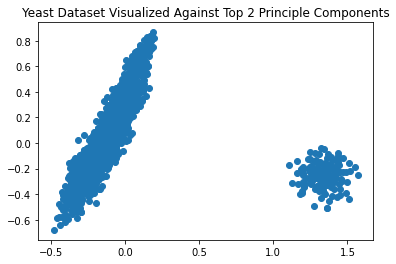

In [6]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Yeast Dataset Visualized Against Top 2 Principle Components')



# Run RTKM

Iteration 100
PALM reached maximum number of iterations


 Number of true positives:  [224, 278, 254, 222, 146, 167, 86, 102, 16, 44, 69, 461, 440, 1, 134] 

 Number of false positives :  [436, 426, 340, 347, 298, 487, 535, 525, 490, 586, 538, 300, 306, 536, 34] 

 Number of true negatives:  [738, 579, 712, 771, 911, 785, 854, 836, 1062, 903, 914, 222, 228, 1093, 1466] 

 Number of false negatives:  [252, 367, 344, 310, 295, 211, 175, 187, 82, 117, 129, 667, 676, 20, 16] 

 F1 scores for each cluster:  [0.3943662  0.41215715 0.4261745  0.40326975 0.3299435  0.32364341
 0.19501134 0.22270742 0.05298013 0.11125158 0.17142857 0.48808894
 0.4726101  0.00358423 0.8427673 ] 

 Average F1 score:  0.32333227459533403 

 me score: 0.10904840922982581


Text(0.5, 1.0, 'Robust Trimmed k Means')

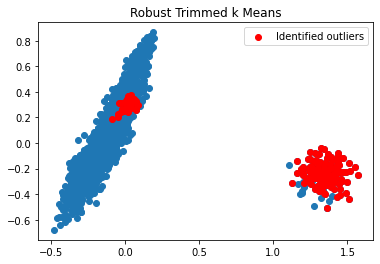

In [16]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0.10, max_iter = 100, num_members = 4) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = RTKM_yeast.weights, pred_outliers = RTKM_yeast.outliers, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')


# Run KMOR



 Number of true positives:  [73, 66, 72, 72, 79, 48, 26, 28, 0, 15, 7, 103, 82, 0, 0] 

 Number of false positives :  [69, 30, 55, 66, 11, 25, 94, 63, 54, 83, 95, 34, 37, 96, 165] 

 Number of true negatives:  [1105, 975, 997, 1052, 1198, 1247, 1295, 1298, 1498, 1406, 1357, 488, 497, 1533, 1335] 

 Number of false negatives:  [403, 579, 526, 460, 362, 330, 235, 261, 98, 146, 191, 1025, 1034, 21, 150] 

 F1 scores for each cluster:  [0.23624595 0.17813765 0.19862069 0.21492537 0.29755179 0.21286031
 0.13648294 0.14736842 0.         0.11583012 0.04666667 0.16284585
 0.13279352 0.         0.        ] 

 Average F1 score:  0.1386886189369304 

 me score: 1.0060318086422517


Text(0.5, 1.0, 'KMOR')

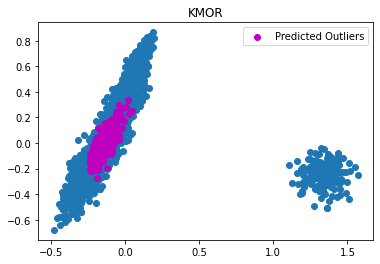

In [10]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=14, percent_outliers= 0.10, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('KMOR')




# Run NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 6199.144551
***** iteration: 2, objective: 5957.333387
***** iteration: 3, objective: 5888.673656
***** iteration: 4, objective: 5840.908212
***** iteration: 5, objective: 5816.821106
***** iteration: 6, objective: 5804.111422
***** iteration: 7, objective: 5796.533608
***** iteration: 8, objective: 5791.227537
***** iteration: 9, objective: 5787.210391
***** iteration: 10, objective: 5784.939588
***** iteration: 11, objective: 5783.417651
***** iteration: 12, objective: 5782.451498
***** iteration: 13, objective: 5781.796847
***** iteration: 14, objective: 5781.408883
***** iteration: 15, objective: 5781.110170
***** iteration: 16, objective: 5780.938402
***** iteration: 17, objective: 5780.780181
***** iteration: 18, objective: 5780.623041
***** iteration: 19, objective: 5780.495492
***** iteration: 20, objective: 5780.369613
***** iteration: 21, objective: 5780.187759
***** iteration: 22, objective: 5780.045693
***** i

Text(0.5, 1.0, 'NEO-k-means')

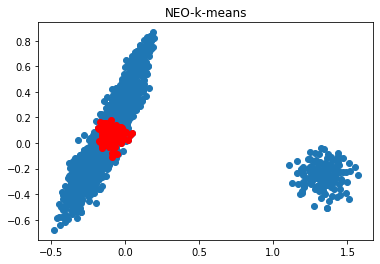

In [15]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_NEO='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=14, percent_outliers=.10, sigma = 3, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

outliers = np.where(pred_outliers_NEO == 0)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c= 'r')
plt.title('NEO-k-means')



In [8]:
alpha_vals = np.linspace(0, .20, 11) 

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=14, kmor_gamma= 1, 
                                                                                neo_sigma = 4, path_to_NEO='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 10, true_labels=true_labels.astype(int).T,
                                                                                membership_option= 'multi')
    
    

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8104.733775
***** iteration: 2, objective: 7611.615348
***** iteration: 3, objective: 7560.253272
***** iteration: 4, objective: 7528.837482
***** iteration: 5, objective: 7505.020575
***** iteration: 6, objective: 7487.695391
***** iteration: 7, objective: 7479.011758
***** iteration: 8, objective: 7473.699710
***** iteration: 9, objective: 7470.640896
***** iteration: 10, objective: 7469.244429
***** iteration: 11, objective: 7468.561117
***** iteration: 12, objective: 7468.080619
***** iteration: 13, objective: 7467.815318
***** iteration: 14, objective: 7467.618738
***** iteration: 15, objective: 7467.487553
***** iteration: 16, objective: 7467.352540
***** iteration: 17, objective: 7467.260015
***** iteration: 18, objective: 7467.167660
***** iteration: 19, objective: 7467.105389
***** iteration: 20, object

/Users/olgadorabiala/Documents/ThesisResearch/PALM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

***** iteration: 1, objective: 8184.596689
***** iteration: 2, objective: 7717.194266
***** iteration: 3, objective: 7678.140812
***** iteration: 4, objective: 7640.531415
***** iteration: 5, objective: 7613.852495
***** iteration: 6, objective: 7596.541944
***** iteration: 7, objective: 7584.367408
***** iteration: 8, objective: 7576.854226
***** iteration: 9, objective: 7570.769460
***** iteration: 10, objective: 7565.966526
***** iteration: 11, objective: 7561.877187
***** iteration: 12, objective: 7559.308869
***** iteration: 13, objective: 7557.733682
***** iteration: 14, objective: 7556.518347
***** iteration: 15, objective: 7555.676066
***** iteration: 16, objective: 7554.822744
***** iteration: 17, objective: 7553.819156
***** iteration: 18, objective: 7552.943564
***** iteration: 19, objective: 7552.447193
***** iteration: 20, objective: 7552.265269
***** iteration: 21, objective: 7552.194248
***** iteration: 22, objective: 7552.124284
***** i

***** iteration: 23, objective: 7414.156574
***** iteration: 24, objective: 7414.149422
***** iteration: 25, objective: 7414.139192
***** iteration: 26, objective: 7414.127651
***** iteration: 27, objective: 7414.124897
***** iteration: 28, objective: 7414.124897
***** No. of iterations done: 28
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8107.687323
***** iteration: 2, objective: 7580.047515
***** iteration: 3, objective: 7512.591050
***** iteration: 4, objective: 7473.126649
***** iteration: 5, objective: 7448.619785
***** iteration: 6, objective: 7434.753644
***** iteration: 7, objective: 7426.428783
***** iteration: 8, objective: 7422.039853
***** iteration: 9, objective: 7419.648711
***** iteration: 10, objective: 7418.061602
***** iteration: 11, objecti

***** iteration: 19, objective: 7401.965951
***** iteration: 20, objective: 7401.921864
***** iteration: 21, objective: 7401.901536
***** iteration: 22, objective: 7401.888492
***** iteration: 23, objective: 7401.872915
***** iteration: 24, objective: 7401.854440
***** iteration: 25, objective: 7401.845473
***** iteration: 26, objective: 7401.842276
***** iteration: 27, objective: 7401.838199
***** iteration: 28, objective: 7401.831845
***** iteration: 29, objective: 7401.826237
***** iteration: 30, objective: 7401.822710
***** iteration: 31, objective: 7401.822710
***** No. of iterations done: 31
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.020, betaN: 33
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8083.030059
***** iteration: 2, objective: 7569.219972
***** iteration: 3, objective: 7501.295865
***** iteration: 4, o

***** iteration: 24, objective: 7426.272423
***** iteration: 25, objective: 7426.257659
***** iteration: 26, objective: 7426.244537
***** iteration: 27, objective: 7426.234367
***** iteration: 28, objective: 7426.222257
***** iteration: 29, objective: 7426.213445
***** iteration: 30, objective: 7426.195774
***** iteration: 31, objective: 7426.187497
***** iteration: 32, objective: 7426.173748
***** iteration: 33, objective: 7426.144256
***** iteration: 34, objective: 7426.135612
***** iteration: 35, objective: 7426.135612
***** No. of iterations done: 35
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.020, betaN: 33
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8114.447946
***** iteration: 2, objective: 7590.441318
***** iteration: 3, objective: 7524.346948
***** iteration: 4, objective: 7482.923573
***** iteration: 5, ob

***** iteration: 28, objective: 7502.666309
***** iteration: 29, objective: 7502.657112
***** iteration: 30, objective: 7502.647296
***** iteration: 31, objective: 7502.647296
***** No. of iterations done: 31
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.040, betaN: 66
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8088.749034
***** iteration: 2, objective: 7588.262313
***** iteration: 3, objective: 7523.853156
***** iteration: 4, objective: 7484.585003
***** iteration: 5, objective: 7464.029440
***** iteration: 6, objective: 7451.226245
***** iteration: 7, objective: 7443.688740
***** iteration: 8, objective: 7439.542406
***** iteration: 9, objective: 7436.262628
***** iteration: 10, objective: 7433.297309
***** iteration: 11, objective: 7431.059036
***** iteration: 12, objective: 7429.315277
***** iteration: 13, object

***** iteration: 6, objective: 7482.140245
***** iteration: 7, objective: 7472.245096
***** iteration: 8, objective: 7465.426327
***** iteration: 9, objective: 7461.168878
***** iteration: 10, objective: 7458.290869
***** iteration: 11, objective: 7456.693752
***** iteration: 12, objective: 7455.954988
***** iteration: 13, objective: 7455.499521
***** iteration: 14, objective: 7455.220759
***** iteration: 15, objective: 7455.014762
***** iteration: 16, objective: 7454.864005
***** iteration: 17, objective: 7454.743768
***** iteration: 18, objective: 7454.664545
***** iteration: 19, objective: 7454.617976
***** iteration: 20, objective: 7454.566986
***** iteration: 21, objective: 7454.538093
***** iteration: 22, objective: 7454.506840
***** iteration: 23, objective: 7454.488127
***** iteration: 24, objective: 7454.477184
***** iteration: 25, objective: 7454.477184
***** No. of iterations done: 25
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.040, be

***** iteration: 5, objective: 7452.743430
***** iteration: 6, objective: 7438.443410
***** iteration: 7, objective: 7429.662357
***** iteration: 8, objective: 7423.496813
***** iteration: 9, objective: 7419.233180
***** iteration: 10, objective: 7416.090463
***** iteration: 11, objective: 7414.378883
***** iteration: 12, objective: 7413.467530
***** iteration: 13, objective: 7412.883758
***** iteration: 14, objective: 7412.536834
***** iteration: 15, objective: 7412.249898
***** iteration: 16, objective: 7412.005644
***** iteration: 17, objective: 7411.806360
***** iteration: 18, objective: 7411.599477
***** iteration: 19, objective: 7411.498969
***** iteration: 20, objective: 7411.442248
***** iteration: 21, objective: 7411.406990
***** iteration: 22, objective: 7411.387311
***** iteration: 23, objective: 7411.379026
***** iteration: 24, objective: 7411.376253
***** iteration: 25, objective: 7411.376253
***** No. of iterations done: 25
***** Total no. of data points: 1650
***** alpha

***** iteration: 19, objective: 7517.508219
***** iteration: 20, objective: 7517.407412
***** iteration: 21, objective: 7517.357449
***** iteration: 22, objective: 7517.330451
***** iteration: 23, objective: 7517.315901
***** iteration: 24, objective: 7517.296783
***** iteration: 25, objective: 7517.269066
***** iteration: 26, objective: 7517.248769
***** iteration: 27, objective: 7517.230378
***** iteration: 28, objective: 7517.218042
***** iteration: 29, objective: 7517.200444
***** iteration: 30, objective: 7517.181280
***** iteration: 31, objective: 7517.163459
***** iteration: 32, objective: 7517.156264
***** iteration: 33, objective: 7517.152334
***** iteration: 34, objective: 7517.143958
***** iteration: 35, objective: 7517.140578
***** iteration: 36, objective: 7517.137683
***** iteration: 37, objective: 7517.135221
***** iteration: 38, objective: 7517.135221
***** No. of iterations done: 38
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.060

    _pyeval at line 57 column 30

***** iteration: 1, objective: 8071.052277
***** iteration: 2, objective: 7583.380206
***** iteration: 3, objective: 7515.848333
***** iteration: 4, objective: 7477.574051
***** iteration: 5, objective: 7456.250439
***** iteration: 6, objective: 7445.760185
***** iteration: 7, objective: 7439.426189
***** iteration: 8, objective: 7435.383254
***** iteration: 9, objective: 7432.479094
***** iteration: 10, objective: 7430.401586
***** iteration: 11, objective: 7428.712319
***** iteration: 12, objective: 7427.231432
***** iteration: 13, objective: 7426.303657
***** iteration: 14, objective: 7425.481183
***** iteration: 15, objective: 7425.031645
***** iteration: 16, objective: 7424.766772
***** iteration: 17, objective: 7424.561420
***** iteration: 18, objective: 7424.442183
***** iteration: 19, objective: 7424.343792
***** iteration: 20, objective: 7424.278327
***** iteration: 21, objective: 7424.203867
***** iteration: 22, objective: 7424.155664
***** i

***** iteration: 24, objective: 7559.111325
***** iteration: 25, objective: 7559.103313
***** iteration: 26, objective: 7559.099029
***** iteration: 27, objective: 7559.099029
***** No. of iterations done: 27
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.080, betaN: 132
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8089.418768
***** iteration: 2, objective: 7585.727187
***** iteration: 3, objective: 7513.742750
***** iteration: 4, objective: 7473.564010
***** iteration: 5, objective: 7452.620013
***** iteration: 6, objective: 7439.528073
***** iteration: 7, objective: 7429.848569
***** iteration: 8, objective: 7424.587325
***** iteration: 9, objective: 7420.829221
***** iteration: 10, objective: 7417.752709
***** iteration: 11, objective: 7414.969194
***** iteration: 12, objective: 7413.450033
***** iteration: 13, objec

***** iteration: 21, objective: 7400.463694
***** No. of iterations done: 21
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.080, betaN: 132
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8134.661641
***** iteration: 2, objective: 7635.293644
***** iteration: 3, objective: 7576.391924
***** iteration: 4, objective: 7532.440731
***** iteration: 5, objective: 7497.978065
***** iteration: 6, objective: 7469.619479
***** iteration: 7, objective: 7452.365102
***** iteration: 8, objective: 7441.457979
***** iteration: 9, objective: 7432.696238
***** iteration: 10, objective: 7425.603489
***** iteration: 11, objective: 7421.212474
***** iteration: 12, objective: 7418.334259
***** iteration: 13, objective: 7416.198145
***** iteration: 14, objective: 7413.780396
***** iteration: 15, objective: 7412.404137
***** iteration: 16, objec

    _pyeval at line 57 column 30

***** iteration: 1, objective: 8142.013544
***** iteration: 2, objective: 7631.339676
***** iteration: 3, objective: 7575.264571
***** iteration: 4, objective: 7536.200793
***** iteration: 5, objective: 7506.996961
***** iteration: 6, objective: 7487.921341
***** iteration: 7, objective: 7474.812607
***** iteration: 8, objective: 7466.466621
***** iteration: 9, objective: 7461.141558
***** iteration: 10, objective: 7457.505337
***** iteration: 11, objective: 7453.993586
***** iteration: 12, objective: 7451.016836
***** iteration: 13, objective: 7448.771625
***** iteration: 14, objective: 7447.511517
***** iteration: 15, objective: 7446.774555
***** iteration: 16, objective: 7446.366876
***** iteration: 17, objective: 7446.093454
***** iteration: 18, objective: 7445.919871
***** iteration: 19, objective: 7445.764432
***** iteration: 20, objective: 7445.683876
***** iteration: 21, objective: 7445.635967
***** iteration: 22, objective: 7445.614051
***** i

Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8177.876231
***** iteration: 2, objective: 7613.197536
***** iteration: 3, objective: 7551.102105
***** iteration: 4, objective: 7513.443829
***** iteration: 5, objective: 7489.180447
***** iteration: 6, objective: 7474.915455
***** iteration: 7, objective: 7467.606156
***** iteration: 8, objective: 7463.030615
***** iteration: 9, objective: 7459.937795
***** iteration: 10, objective: 7457.503528
***** iteration: 11, objective: 7456.019536
***** iteration: 12, objective: 7454.993622
***** iteration: 13, objective: 7454.290988
***** iteration: 14, objective: 7453.940376
***** iteration: 15, objective: 7453.797349
***** iteration: 16, objective: 7453.729767
***** iteration: 17, objective: 7453.673445
***** iteration: 18, objective: 7453.647336
***** iteration: 19, objective: 7453.639501
***** iteration: 20, objective: 7453.632696
***** iteration: 21, objective: 7453.62

***** beta: 0.120, betaN: 198
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8118.482233
***** iteration: 2, objective: 7633.088594
***** iteration: 3, objective: 7585.985295
***** iteration: 4, objective: 7555.297297
***** iteration: 5, objective: 7536.243638
***** iteration: 6, objective: 7524.449478
***** iteration: 7, objective: 7516.871914
***** iteration: 8, objective: 7512.058182
***** iteration: 9, objective: 7508.203836
***** iteration: 10, objective: 7505.725682
***** iteration: 11, objective: 7504.182863
***** iteration: 12, objective: 7503.411614
***** iteration: 13, objective: 7502.928878
***** iteration: 14, objective: 7502.611669
***** iteration: 15, objective: 7502.386698
***** iteration: 16, objective: 7502.251772
***** iteration: 17, objective: 7502.142834
***** iteration: 18, objective: 7502.095932
***** iteration: 19, objective: 7502.0863

***** iteration: 31, objective: 7473.584622
***** iteration: 32, objective: 7473.578211
***** iteration: 33, objective: 7473.578211
***** No. of iterations done: 33
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.120, betaN: 198
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8154.611491
***** iteration: 2, objective: 7649.781036
***** iteration: 3, objective: 7594.982673
***** iteration: 4, objective: 7559.909148
***** iteration: 5, objective: 7533.144262
***** iteration: 6, objective: 7513.558270
***** iteration: 7, objective: 7496.425118
***** iteration: 8, objective: 7484.788369
***** iteration: 9, objective: 7477.042941
***** iteration: 10, objective: 7471.014515
***** iteration: 11, objective: 7467.506807
***** iteration: 12, objective: 7465.591451
***** iteration: 13, objective: 7464.524400
***** iteration: 14, objec

***** iteration: 26, objective: 7435.548226
***** iteration: 27, objective: 7435.545019
***** iteration: 28, objective: 7435.542118
***** iteration: 29, objective: 7435.542118
***** No. of iterations done: 29
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.140, betaN: 231
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8217.368548
***** iteration: 2, objective: 7634.816220
***** iteration: 3, objective: 7576.975935
***** iteration: 4, objective: 7517.716561
***** iteration: 5, objective: 7428.499825
***** iteration: 6, objective: 7398.767879
***** iteration: 7, objective: 7384.832483
***** iteration: 8, objective: 7375.693006
***** iteration: 9, objective: 7368.331944
***** iteration: 10, objective: 7362.610945
***** iteration: 11, objective: 7358.463730
***** iteration: 12, objective: 7355.994162
***** iteration: 13, objec

    _pyeval at line 57 column 30

***** iteration: 1, objective: 8256.992760
***** iteration: 2, objective: 7747.150305
***** iteration: 3, objective: 7717.367891
***** iteration: 4, objective: 7695.324043
***** iteration: 5, objective: 7676.095383
***** iteration: 6, objective: 7659.173558
***** iteration: 7, objective: 7644.763746
***** iteration: 8, objective: 7634.892683
***** iteration: 9, objective: 7629.528892
***** iteration: 10, objective: 7626.432376
***** iteration: 11, objective: 7624.230767
***** iteration: 12, objective: 7622.460260
***** iteration: 13, objective: 7621.234312
***** iteration: 14, objective: 7620.247643
***** iteration: 15, objective: 7619.834678
***** iteration: 16, objective: 7619.675772
***** iteration: 17, objective: 7619.568356
***** iteration: 18, objective: 7619.491767
***** iteration: 19, objective: 7619.445696
***** iteration: 20, objective: 7619.415994
***** iteration: 21, objective: 7619.398869
***** iteration: 22, objective: 7619.391204
***** i

***** iteration: 7, objective: 7441.222479
***** iteration: 8, objective: 7434.637909
***** iteration: 9, objective: 7430.053327
***** iteration: 10, objective: 7427.073186
***** iteration: 11, objective: 7425.185910
***** iteration: 12, objective: 7423.821134
***** iteration: 13, objective: 7422.838100
***** iteration: 14, objective: 7422.253547
***** iteration: 15, objective: 7421.967665
***** iteration: 16, objective: 7421.776785
***** iteration: 17, objective: 7421.603347
***** iteration: 18, objective: 7421.473592
***** iteration: 19, objective: 7421.355892
***** iteration: 20, objective: 7421.276508
***** iteration: 21, objective: 7421.239710
***** iteration: 22, objective: 7421.217631
***** iteration: 23, objective: 7421.191942
***** iteration: 24, objective: 7421.177529
***** iteration: 25, objective: 7421.160496
***** iteration: 26, objective: 7421.140615
***** iteration: 27, objective: 7421.137691
***** iteration: 28, objective: 7421.137691
***** No. of iterations done: 28
**

***** iteration: 16, objective: 7409.553448
***** iteration: 17, objective: 7409.372221
***** iteration: 18, objective: 7409.307475
***** iteration: 19, objective: 7409.243882
***** iteration: 20, objective: 7409.204438
***** iteration: 21, objective: 7409.193110
***** iteration: 22, objective: 7409.179249
***** iteration: 23, objective: 7409.176008
***** iteration: 24, objective: 7409.172662
***** iteration: 25, objective: 7409.165806
***** iteration: 26, objective: 7409.157725
***** iteration: 27, objective: 7409.157725
***** No. of iterations done: 27
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.160, betaN: 264
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8090.453139
***** iteration: 2, objective: 7573.681780
***** iteration: 3, objective: 7514.783998
***** iteration: 4, objective: 7480.756026
***** iteration: 5, o

***** iteration: 21, objective: 7453.970637
***** iteration: 22, objective: 7453.763344
***** iteration: 23, objective: 7453.622988
***** iteration: 24, objective: 7453.540874
***** iteration: 25, objective: 7453.512769
***** iteration: 26, objective: 7453.497048
***** iteration: 27, objective: 7453.492156
***** iteration: 28, objective: 7453.492156
***** No. of iterations done: 28
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.180, betaN: 297
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8174.655668
***** iteration: 2, objective: 7639.909973
***** iteration: 3, objective: 7518.383489
***** iteration: 4, objective: 7469.902923
***** iteration: 5, objective: 7442.075413
***** iteration: 6, objective: 7423.705649
***** iteration: 7, objective: 7408.917513
***** iteration: 8, objective: 7398.459057
***** iteration: 9, objec

***** iteration: 11, objective: 7351.834102
***** iteration: 12, objective: 7349.471124
***** iteration: 13, objective: 7348.337581
***** iteration: 14, objective: 7347.738156
***** iteration: 15, objective: 7347.350343
***** iteration: 16, objective: 7347.149676
***** iteration: 17, objective: 7347.006867
***** iteration: 18, objective: 7346.917519
***** iteration: 19, objective: 7346.844030
***** iteration: 20, objective: 7346.795773
***** iteration: 21, objective: 7346.786710
***** iteration: 22, objective: 7346.779973
***** iteration: 23, objective: 7346.773163
***** iteration: 24, objective: 7346.766116
***** iteration: 25, objective: 7346.764123
***** iteration: 26, objective: 7346.764123
***** No. of iterations done: 26
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.180, betaN: 297
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 

***** iteration: 18, objective: 7462.450265
***** iteration: 19, objective: 7462.394148
***** iteration: 20, objective: 7462.352902
***** iteration: 21, objective: 7462.307071
***** iteration: 22, objective: 7462.274138
***** iteration: 23, objective: 7462.232864
***** iteration: 24, objective: 7462.213465
***** iteration: 25, objective: 7462.201490
***** iteration: 26, objective: 7462.198795
***** iteration: 27, objective: 7462.198795
***** No. of iterations done: 27
***** Total no. of data points: 1650
***** alpha: 4.000, alphaN: 6600
***** beta: 0.200, betaN: 330
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8126.072827
***** iteration: 2, objective: 7596.327144
***** iteration: 3, objective: 7528.947134
***** iteration: 4, objective: 7487.337121
***** iteration: 5, objective: 7458.508693
***** iteration: 6, objective: 7439.985603
***** iteration: 7, obj

***** iteration: 11, objective: 7468.248451
***** iteration: 12, objective: 7465.962201
***** iteration: 13, objective: 7464.451454
***** iteration: 14, objective: 7463.605305
***** iteration: 15, objective: 7463.062824
***** iteration: 16, objective: 7462.741401
***** iteration: 17, objective: 7462.575764
***** iteration: 18, objective: 7462.477307
***** iteration: 19, objective: 7462.385337
***** iteration: 20, objective: 7462.330446
***** iteration: 21, objective: 7462.300312
***** iteration: 22, objective: 7462.282148
***** iteration: 23, objective: 7462.274604
***** iteration: 24, objective: 7462.264200
***** iteration: 25, objective: 7462.252618
***** iteration: 26, objective: 7462.239043
***** iteration: 27, objective: 7462.217069
***** iteration: 28, objective: 7462.208800
***** iteration: 29, objective: 7462.195301
***** iteration: 30, objective: 7462.185993
***** iteration: 31, objective: 7462.179337
***** iteration: 32, objective: 7462.179337
***** No. of iterations done: 32

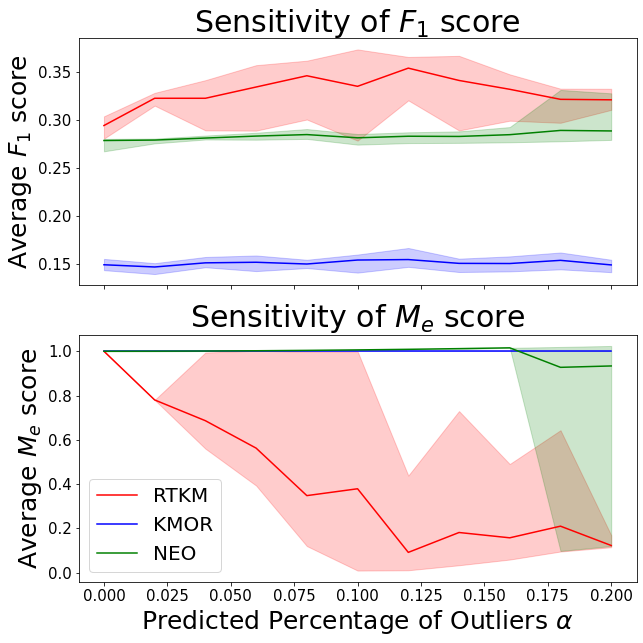

In [21]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

Load results from paper

In [18]:
alpha_vals = np.linspace(0, .20, 11) 


me_avg_rtkm = np.load('figure_data/Me_avg_RTKM_yeast2.npy')
me_avg_kmor= np.load('figure_data/Me_avg_KMOR_yeast2.npy')
me_avg_kmor_1 = np.load('figure_data/Me_avg_KMOR_yeast1_2.npy')
me_avg_neo = np.load('figure_data/Me_avg_NEO_yeast2.npy')

f1_avg_rtkm = np.load('figure_data/f1_avg_RTKM_yeast2.npy')
f1_avg_kmor = np.load('figure_data/f1_avg_KMOR_yeast2.npy')
f1_avg_kmor_1 = np.load('figure_data/f1_avg_KMOR_yeast1_2.npy')
f1_avg_neo = np.load('figure_data/f1_avg_NEO_yeast2.npy')

min_rtkm = np.load('figure_data/min_RTKM2.npy')
max_rtkm = np.load('figure_data/max_RTKM2.npy')

min_kmor = np.load('figure_data/min_KMOR2.npy')
max_kmor = np.load('figure_data/max_KMOR2.npy')

min_kmor_1 = np.load('figure_data/min_KMOR_1_2.npy')
max_kmor_1 = np.load('figure_data/max_KMOR_1_2.npy')

min_neo = np.load('figure_data/min_NEO2.npy')
max_neo = np.load('figure_data/max_NEO2.npy')



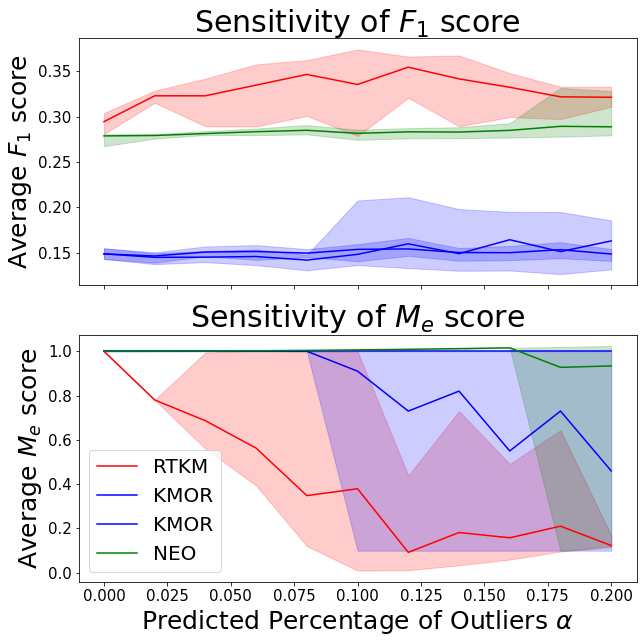

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_kmor_1, label = 'KMOR gamma = 1', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor_1[0,:], max_kmor_1[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_kmor_1, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor_1[1,:], max_kmor_1[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)